# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [23]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd

## Dataset


In [24]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")


In [25]:
loan_data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

## EDA
Uncomment to see desired output. Add more analysis if you like

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    

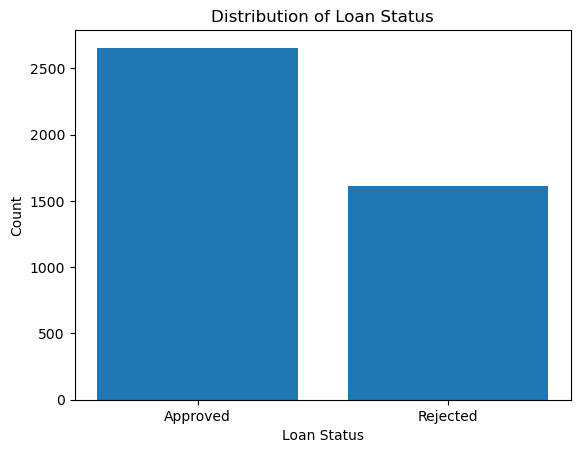

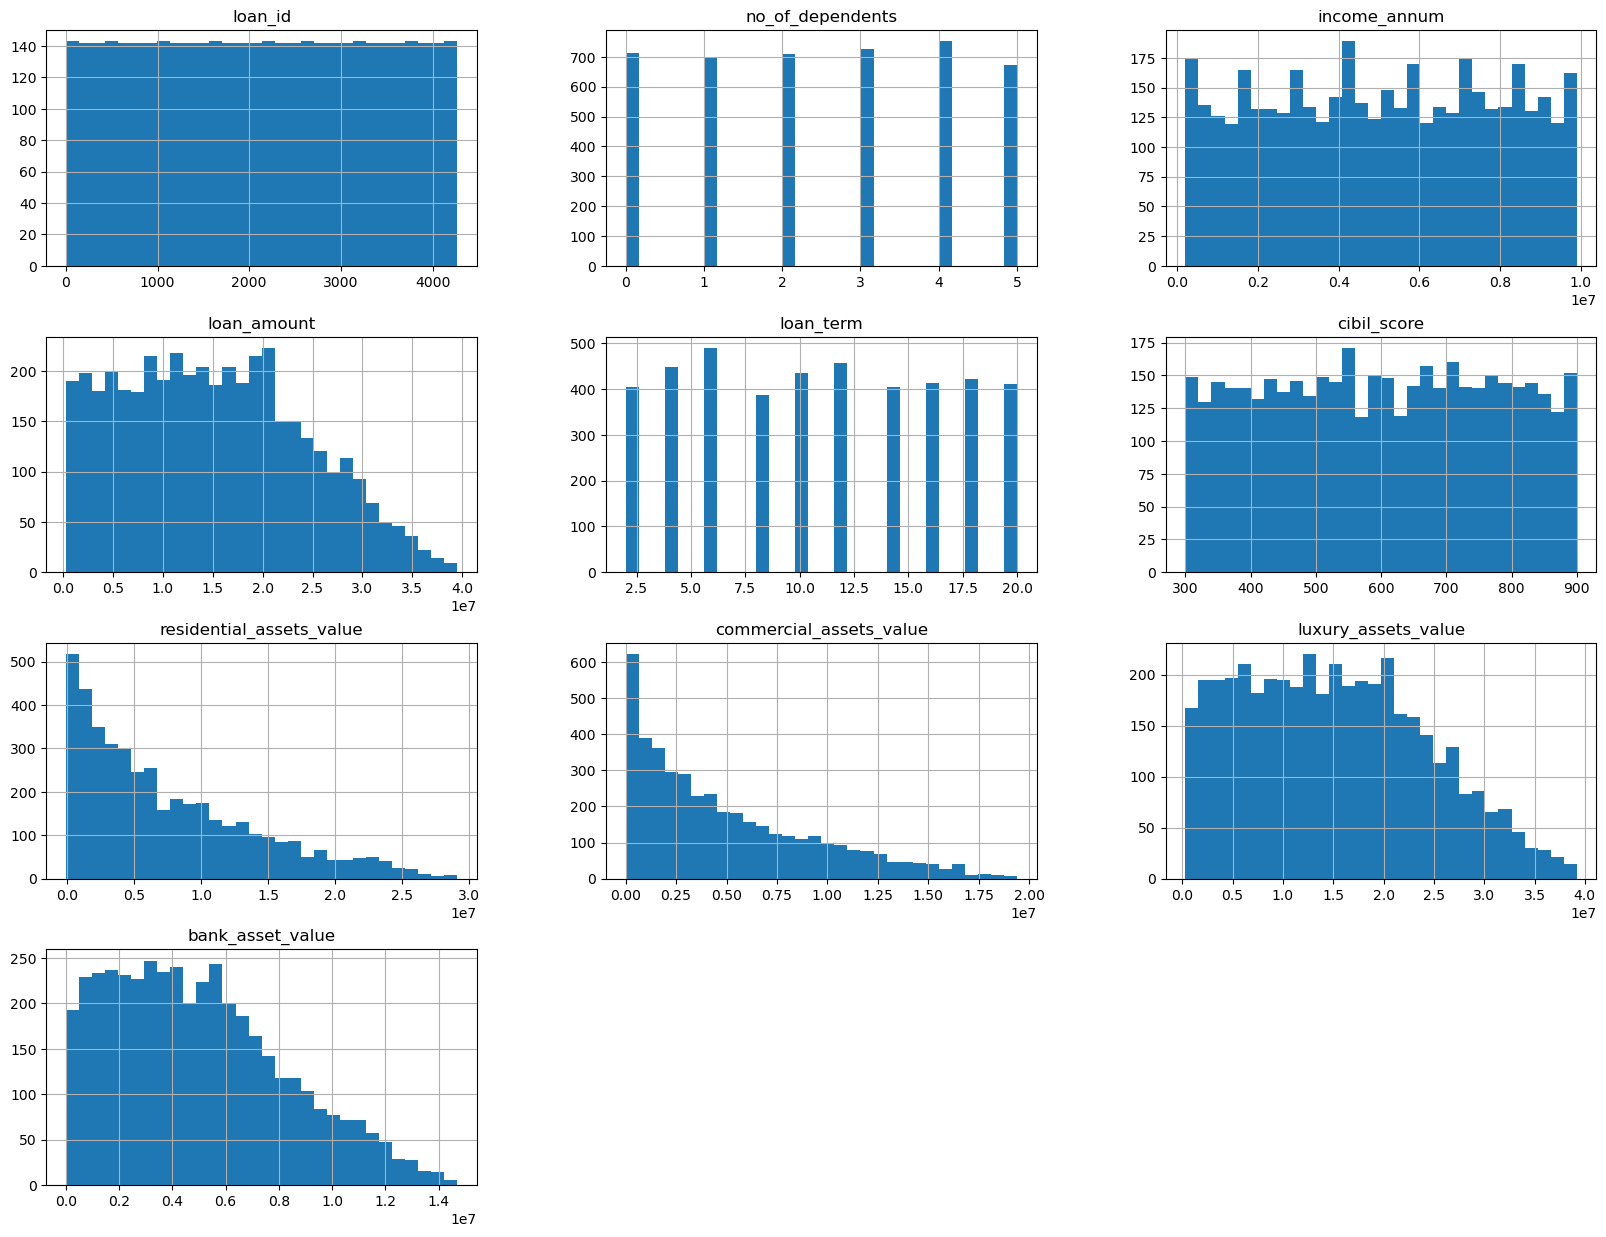

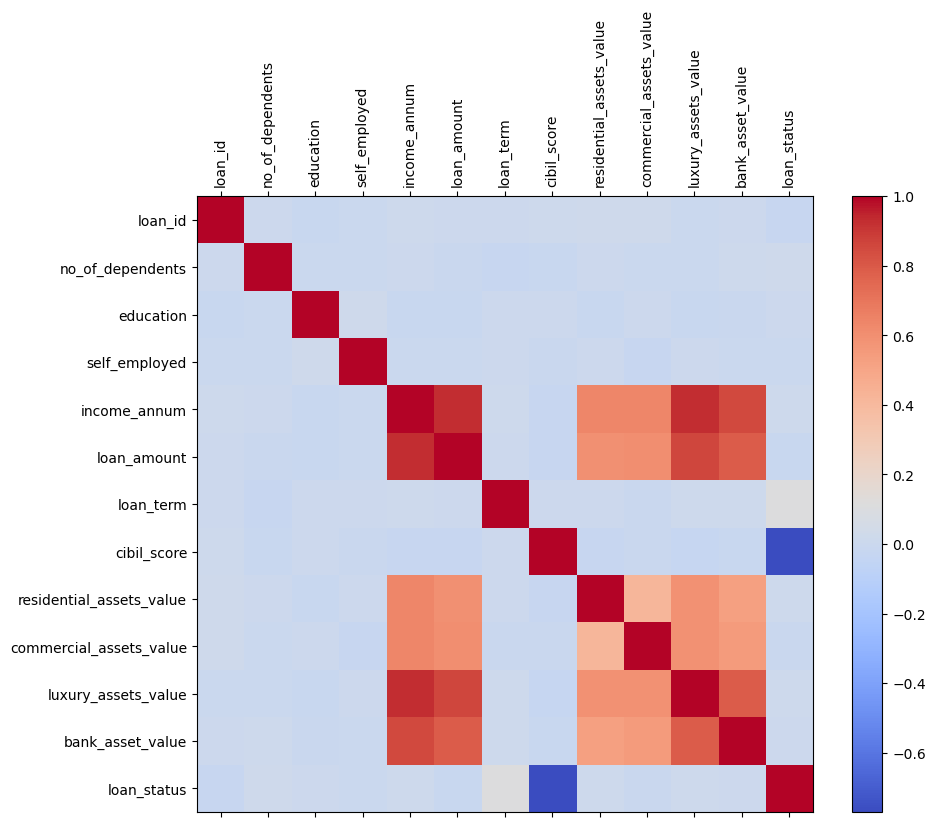

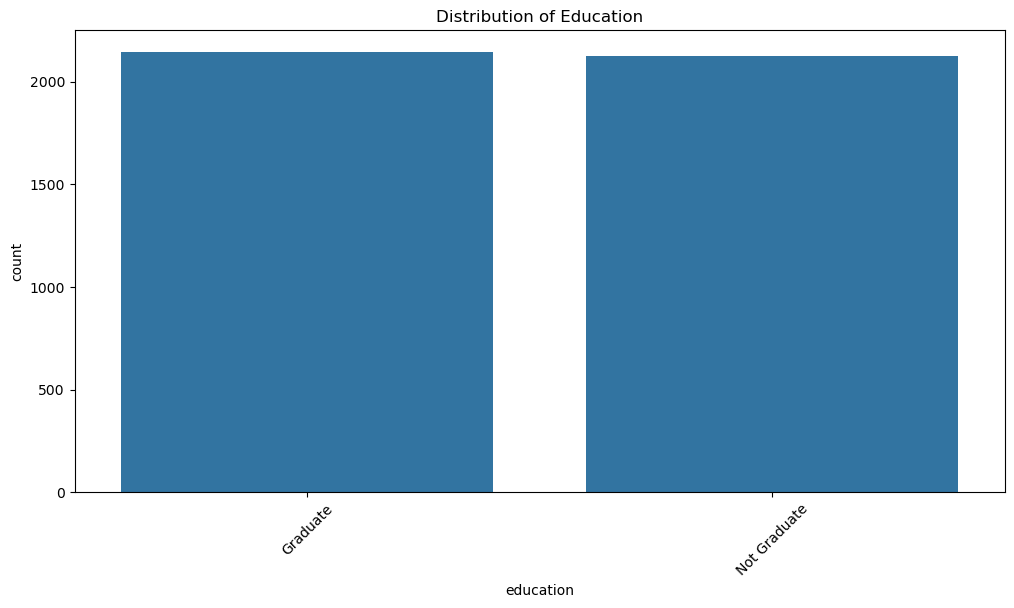

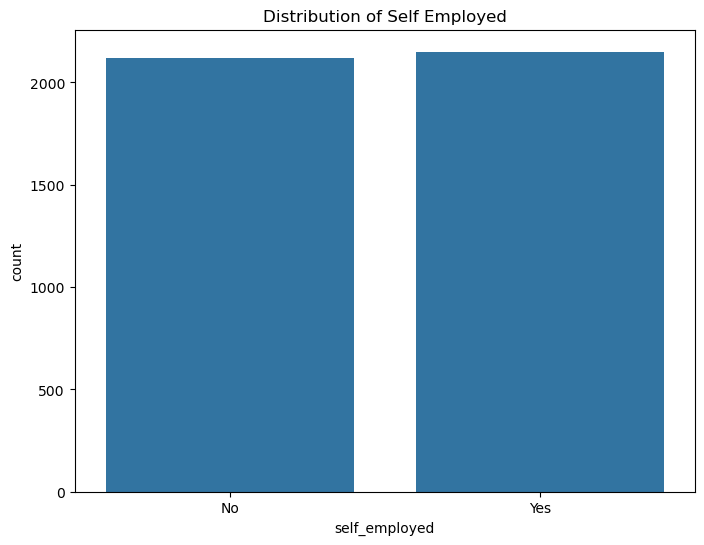

In [26]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


print(loan_data.columns)
print(loan_data.describe())

print(loan_data.isnull().sum())

loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

loan_data.hist(bins=30, figsize=(20, 15))
categirial_col=[]
for col in loan_data.columns:
    if loan_data[col].dtype in ['object', 'bool'] and loan_data[col].nunique() < 60:
        categirial_col.append(col)

loan_copy=loan_data.copy()
le=LabelEncoder()
for col in categirial_col:
    loan_copy[col]=le.fit_transform(loan_data[col])
corr_matrix = loan_copy.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.figure(figsize=(12, 6))
sns.countplot(data=loan_data, x='education')
plt.title('Distribution of Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='self_employed')
plt.title('Distribution of Self Employed')
plt.show()



## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [27]:
from collections import Counter
categirial_col

['education', 'self_employed', 'loan_status']

In [28]:

Counter(loan_data['loan_status'])

Counter({'Approved': 2656, 'Rejected': 1613})

In [29]:
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [30]:
loan_data.isnull().sum().sort_values(ascending=False)

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [31]:
X=loan_data.drop('loan_status', axis=1)
y=loan_data['loan_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
#from tabpfn import TabPFNClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
from sklearn.pipeline import Pipeline

pipeline_dt=Pipeline([('GaussianNB',GaussianNB())])
pipeline_knn=Pipeline([('KNeighborsClassifier',KNeighborsClassifier())])
pipeline_rf=Pipeline([ ('RandomForestClassifier',RandomForestClassifier())])
pipeline_dt=Pipeline([ ('DecisionTreeClassifier',DecisionTreeClassifier())])
pipeline_xgb=Pipeline([ ('XGBClassifier',XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.2,subsample=0.9,colsample_bytree=0.85,scale_pos_weight=4.71,objective='binary:logistic'))])
"""pipeline_lgr=Pipeline([ ('LogisticRegression',LogisticRegression(solver='lbfgs', max_iter=1000000))])"""
pipeline_lgbm=Pipeline([ ('LGBMClassifier',LGBMClassifier(objective='binary',class_weight='balanced',verbose=-1))])
pipeline_catB=Pipeline([ ('CatBoostClassifier',CatBoostClassifier(verbose = 0 ,auto_class_weights='Balanced',eval_metric='Logloss'))])
pipeline_adaB=Pipeline([ ('AdaBoostClassifier',GradientBoostingClassifier())])


pipelines = [pipeline_dt, pipeline_knn, pipeline_rf,pipeline_dt,pipeline_xgb  , pipeline_lgbm , pipeline_catB , pipeline_adaB]
pipe_dict = {0: 'GaussianNB', 1: 'KNeighborsClassifier', 2: 'RandomForestClassifier',
             3: 'DecisionTreeClassifier',4: 'XGBClassifier' ,
             5 : 'LGBMClassifier' , 6 : 'CatBoostClassifier' ,7 : 'AdaBoostClassifier' }

## Model Training and Evaluation

In [34]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
import numpy as np


def balanced_logarithmic_loss_new(y_true, y_pred):

    # Nc is the number of observations
    N_1 = np.sum(y_true == 1, axis=0)
    N_0 = np.sum(y_true == 0, axis=0)

    # In order to avoid the extremes of the log function, each predicted probability 𝑝 is replaced with max(min(𝑝,1−10−15),10−15)
    y_pred = np.maximum(np.minimum(y_pred, 1 - 1e-15), 1e-15)

    # balanced logarithmic loss
    loss_numerator = - (1/N_0) * np.sum((1 - y_true) * np.log(1-y_pred)) - (1/N_1) * np.sum(y_true * np.log(y_pred))

    return loss_numerator / 2

scorer = make_scorer(balanced_logarithmic_loss_new, greater_is_better=False, needs_proba=True)

original_results = dict()
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train.values,y_train.values.ravel(), cv=5 ,scoring=scorer).mean()
    original_results[pipe_dict[i]] = -cv_score


/home/qaz/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1416, number of negative: 860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 2276, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [38]:
print("Balanced Logarithmic Loss\n")

for key , value in sorted(original_results.items(),key=lambda item : item[1]):
    print(key , value)

import time
print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

Balanced Logarithmic Loss

CatBoostClassifier 0.06183133900326667
AdaBoostClassifier 0.07310150348745233
LGBMClassifier 0.07890250807806008
XGBClassifier 0.0791348423635266
RandomForestClassifier 0.09569461174809078
GaussianNB 1.1446293800040073
DecisionTreeClassifier 1.1742436036281354
KNeighborsClassifier 2.4353691080215367
2024-09-16 12:59:42


In [39]:
#using auc
from sklearn.metrics import roc_auc_score

auc_results = dict()
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train.values,y_train.values.ravel(), cv=5 ,scoring='roc_auc').mean()
    auc_results[pipe_dict[i]] = cv_score

[LightGBM] [Info] Number of positive: 1700, number of negative: 1032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1685
[LightGBM] [Info] Number of data points in the train set: 2732, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [40]:

print("AUC\n")

for key , value in sorted(auc_results.items(),key=lambda item : item[1],reverse=True):
    print(key , value)

print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

AUC

CatBoostClassifier 0.9978622891016873
LGBMClassifier 0.9972111263109895
XGBClassifier 0.9969220246238031
AdaBoostClassifier 0.9969192886456908
RandomForestClassifier 0.996546283629731
GaussianNB 0.9731190150478797
DecisionTreeClassifier 0.9717902416780666
KNeighborsClassifier 0.5152567259461925
2024-09-16 13:01:50


## Model Optimization and Testing

In [50]:
import optuna

X_train_optuna, X_valid, y_train_optuna, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'loss_function': 'Logloss',  
        'custom_metric': ['Logloss'],
        'eval_metric': 'Logloss'
    }

    model = CatBoostClassifier(**params, verbose=0)

    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=False)

    preds = model.predict_proba(X_valid)[:, 1]
    
    return balanced_logarithmic_loss_new(y_valid, preds)


In [51]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best parameters:", study.best_params)
print("Best value:", study.best_value)

[I 2024-09-16 13:13:57,084] A new study created in memory with name: no-name-04a500eb-ada3-468a-a1dc-020a0c2a8c31
[I 2024-09-16 13:14:04,510] Trial 0 finished with value: 0.0033373918080481925 and parameters: {'iterations': 370, 'depth': 12, 'learning_rate': 0.08228922052123024, 'l2_leaf_reg': 5.535614843835907}. Best is trial 0 with value: 0.0033373918080481925.
[I 2024-09-16 13:14:05,574] Trial 1 finished with value: 0.0043002074394510904 and parameters: {'iterations': 451, 'depth': 9, 'learning_rate': 0.08147188578026317, 'l2_leaf_reg': 5.202617642789964}. Best is trial 0 with value: 0.0033373918080481925.
[I 2024-09-16 13:14:42,331] Trial 2 finished with value: 0.021424111446569215 and parameters: {'iterations': 275, 'depth': 15, 'learning_rate': 0.018260449043868816, 'l2_leaf_reg': 4.405034806561554}. Best is trial 0 with value: 0.0033373918080481925.
[I 2024-09-16 13:14:43,991] Trial 3 finished with value: 0.004768666943104257 and parameters: {'iterations': 304, 'depth': 10, 'lea

Best parameters: {'iterations': 202, 'depth': 10, 'learning_rate': 0.10110024230625449, 'l2_leaf_reg': 1.7870550525500146}
Best value: 0.00248020399803686


In [54]:
from sklearn.metrics import log_loss
final_catB = CatBoostClassifier(**study.best_params, verbose=0)
final_catB.fit(X_train, y_train)

preds = final_catB.predict(X_test)
preds_probs = final_catB.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, preds)
log_loss = log_loss(y_test, preds_probs)
balanced_log_loss = balanced_logarithmic_loss_new(y_test, preds_probs)
roc_auc = roc_auc_score(y_test, preds_probs)


print(f"Accuracy: {accuracy}")
print(f"Log Loss: {log_loss}")
print(f"Balanced Logarithmic Loss: {balanced_log_loss}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9836065573770492
Log Loss: 0.04972608717506089
Balanced Logarithmic Loss: 0.05835282268270653
ROC AUC: 0.9988863817903015


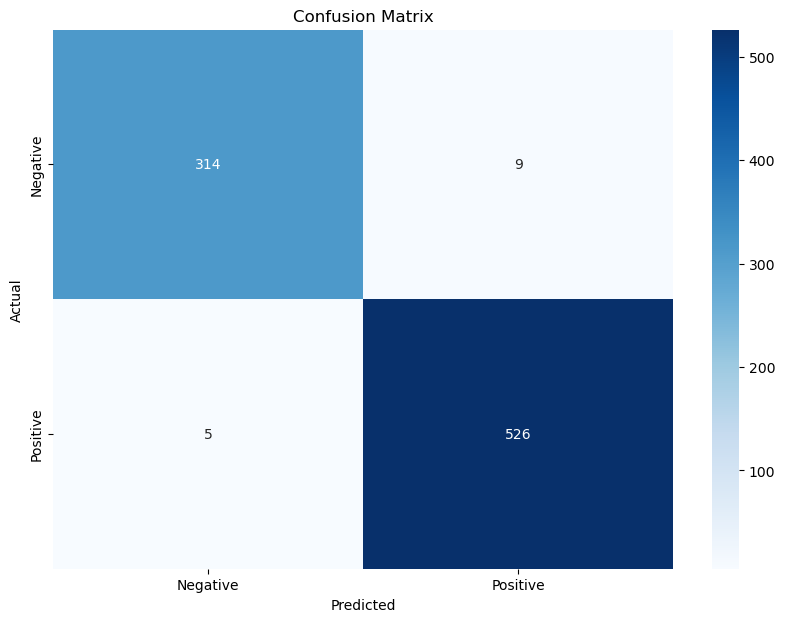

In [61]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.show()